<a href="https://colab.research.google.com/github/EWECORP/DScience_41870/blob/main/ProyectoDS_Parte_III_Eduardo_Ettlin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

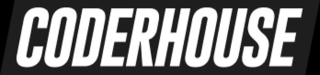

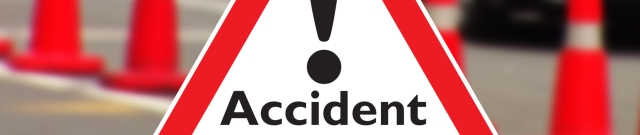

# **CURSO DE DATA SCIENCE**

# **DESAFIO N° 5 - ESTRUCTURANDO UN PROYECTO DE DS (parte III)**

*AUTOR: Eduardo Ettlin


# <b> Modelo de árbol de decisión y logistica

In [1]:
from google.colab import drive
import os
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


   
**Fuentes para el AC:** <br> [Caso Estudio - US Accidentes de Tráfico](https://docs.google.com/document/d/16zvQYkQ2vV71mZ_4ZNimflcq4gFMe6Uq/edit?usp=share_link&ouid=101863336576100131323&rtpof=true&sd=true)
<br>
[Dataset](https://drive.google.com/file/d/1cge_hK7Va8FpgKtd-M_9vQYBLQmJd7pX/view?usp=share_link)


In [3]:
import warnings
warnings.filterwarnings("ignore")

# manejo de data
import pandas as pd
#pd.options.display.max_columns = 100
pd.options.display.float_format = '{:.3f}'.format

# visualizaciones
import matplotlib.pyplot as plt
import seaborn as sns


## Data

Para simplicidad en la consulta, se proporciona diccionario de descripciones de campos.

In [4]:
d_desc = {'ID':'Este es un identificador único del registro de accidentes. ' ,
'Severity':'Muestra la gravedad del accidente, un número entre 1 y 4, donde 1 indica el menor impacto en el tráfico (es decir, breve retraso como resultado del accidente) y 4 indica un impacto significativo en el tráfico (es decir, mucho retraso). ' ,
'Start_Time':'Muestra la hora de inicio del accidente en la zona horaria local. ' ,
'End_Time':'Muestra la hora de finalización del accidente en la zona horaria local. La hora de finalización aquí se refiere a cuándo se descartó el impacto del accidente en el flujo de tráfico. ' ,
'Start_Lat':'Muestra la latitud en coordenadas GPS del punto de inicio. ' ,
'Start_Lng':'Muestra la longitud en coordenadas GPS del punto de inicio. ' ,
'End_Lat':'Muestra la latitud en coordenadas GPS del punto final. ' ,
'End_Lng':'Muestra la longitud en coordenadas GPS del punto final. ' ,
'Distance(mi)':'La longitud de la extensión de la carretera afectada por el accidente. ' ,
'Description':'Muestra la descripción del accidente en lenguaje natural. ' ,
'Number':'Muestra el número de calle en el campo de dirección. ' ,
'Street':'Muestra el nombre de la calle en el campo de dirección. ' ,
'Side':'Muestra el lado relativo de la calle (Derecha/Izquierda) en el campo de dirección. ' ,
'City':'Muestra la ciudad en el campo de dirección. ' ,
'County':'Muestra el condado en el campo de dirección. ' ,
'State':'Muestra el estado en el campo de dirección. ' ,
'Zipcode':'Muestra el código postal en el campo de dirección. ' ,
'Country':'Muestra el país en el campo de dirección. ' ,
'Timezone':'Muestra la zona horaria según la ubicación del accidente (este, centro, etc.). ' ,
'Airport_Code':'Indica una estación meteorológica en el aeropuerto que es la más cercana al lugar del accidente. ' ,
'Weather_Timestamp':'Muestra la marca de tiempo del registro de observación meteorológica (en hora local). ' ,
'Temperature(F)':'Muestra la temperatura (en Fahrenheit). ' ,
'Wind_Chill(F)':'Muestra la sensación térmica (en Fahrenheit). ' ,
'Humidity(%)':'Muestra la humedad (en porcentaje). ' ,
'Pressure(in)':'Muestra la presión del aire (en pulgadas). ' ,
'Visibility(mi)':'Muestra la visibilidad (en millas). ' ,
'Wind_Direction':'Muestra la dirección del viento. ' ,
'Wind_Speed(mph)':'Muestra la velocidad del viento (en millas por hora). ' ,
'Precipitation(in)':'Muestra la cantidad de precipitación en pulgadas, si hay alguna. ' ,
'Weather_Condition':'Muestra las condiciones meteorológicas (lluvia, nieve, tormenta, niebla, etc.) ' ,
'Amenity':'Una anotación de PDI que indica la presencia de un servicio en un lugar cercano. ' ,
'Bump':'Una anotación de PDI que indica la presencia de badenes o jorobas en un lugar cercano. ' ,
'Crossing':'Una anotación de PDI que indica la presencia de un cruce en una ubicación cercana. ' ,
'Give_Way':'Una anotación de PDI que indica la presencia de give_way en una ubicación cercana. ' ,
'Junction':'Una anotación de PDI que indica la presencia de un cruce en una ubicación cercana. ' ,
'No_Exit':'Una anotación de PDI que indica la presencia de no_exit en una ubicación cercana. ' ,
'Railway':'Una anotación de PDI que indica la presencia de vías férreas en un lugar cercano. ' ,
'Roundabout':'Una anotación de PDI que indica la presencia de una rotonda en una ubicación cercana. ' ,
'Station':'Una anotación de PDI que indica la presencia de una estación en una ubicación cercana. ' ,
'Stop':'Una anotación de PDI que indica la presencia de una parada en una ubicación cercana. ' ,
'Traffic_Calming':'Una anotación de PDI que indica la presencia de Traffic_Calming en una ubicación cercana. ' ,
'Traffic_Signal':'Una anotación de PDI que indica la presencia de Traffic_signal en una ubicación cercana. ' ,
'Turning_Loop':'Una anotación de PDI que indica la presencia de turning_loop en una ubicación cercana. ' ,
'Sunrise_Sunset':'Muestra el período del día (es decir, día o noche) en función del amanecer/atardecer. ' ,
'Civil_Twilight':'Muestra el período del día (es decir, día o noche) basado en el crepúsculo civil . ' ,
'Nautical_Twilight':'Muestra el período del día (es decir, día o noche) basado en el crepúsculo náutico . ' ,
'Astronomical_Twilight':'Muestra el período del día (es decir, día o noche) basado en el crepúsculo astronómico . ' 
}

Cargamos el dataset:

In [5]:
full_df =  pd.read_csv('/content/gdrive/MyDrive/DScience_41870/US_Accidents_Dec21_updated.csv') 
full_df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.109,-83.093,40.112,-83.032,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865,-84.063,39.865,-84.049,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.103,-84.525,39.102,-84.524,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062,-81.538,41.062,-81.535,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172,-84.493,39.170,-84.502,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [6]:
# vimos que son 2,845,342 registros y 47 columnas
full_df.shape

(2845342, 47)

In [7]:
full_df.fillna(0, inplace=True)

In [8]:
full_df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.109,-83.093,40.112,-83.032,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865,-84.063,39.865,-84.049,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.103,-84.525,39.102,-84.524,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062,-81.538,41.062,-81.535,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172,-84.493,39.170,-84.502,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


## Procesamiento y Selección de variables  
Con el fin de correr nuestro primer modelo, sólo seleccionaremos en una primera instancia las variables numéricas y la variable objetivo.
    
Nota: Luego de darse el módulo de ingeniería de variables se verán métodos e ideas para la selección de variables y se incluirán las categóricas.

In [9]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [10]:
df_num = full_df.select_dtypes('number') # datos númericos
df_num['Stop'] = full_df['Stop']
df_num.head()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Stop
0,3,40.109,-83.093,40.112,-83.032,3.230,0.000,42.100,36.100,58.000,29.760,10.000,10.400,0.000,False
1,2,39.865,-84.063,39.865,-84.049,0.747,0.000,36.900,0.000,91.000,29.680,10.000,0.000,0.020,False
2,2,39.103,-84.525,39.102,-84.524,0.055,0.000,36.000,0.000,97.000,29.700,10.000,0.000,0.020,False
3,2,41.062,-81.538,41.062,-81.535,0.123,0.000,39.000,0.000,55.000,29.650,10.000,0.000,0.000,False
4,3,39.172,-84.493,39.170,-84.502,0.500,0.000,37.000,29.800,93.000,29.690,10.000,10.400,0.010,False


In [11]:
full_df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

### Valores duplicados:

In [12]:
df_num.drop_duplicates(inplace=True) #df_num = df_num.drop_duplicates()

In [13]:
df_num

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Stop
0,3,40.109,-83.093,40.112,-83.032,3.230,0.000,42.100,36.100,58.000,29.760,10.000,10.400,0.000,False
1,2,39.865,-84.063,39.865,-84.049,0.747,0.000,36.900,0.000,91.000,29.680,10.000,0.000,0.020,False
2,2,39.103,-84.525,39.102,-84.524,0.055,0.000,36.000,0.000,97.000,29.700,10.000,0.000,0.020,False
3,2,41.062,-81.538,41.062,-81.535,0.123,0.000,39.000,0.000,55.000,29.650,10.000,0.000,0.000,False
4,3,39.172,-84.493,39.170,-84.502,0.500,0.000,37.000,29.800,93.000,29.690,10.000,10.400,0.010,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,2,34.002,-117.379,33.999,-117.371,0.543,0.000,86.000,86.000,40.000,28.920,10.000,13.000,0.000,False
2845338,2,32.767,-117.148,32.766,-117.154,0.338,0.000,70.000,70.000,73.000,29.390,10.000,6.000,0.000,False
2845339,2,33.775,-117.848,33.777,-117.857,0.561,0.000,73.000,73.000,64.000,29.740,10.000,10.000,0.000,False
2845340,2,33.992,-118.403,33.983,-118.396,0.772,0.000,71.000,71.000,81.000,29.620,10.000,8.000,0.000,False


In [14]:
len(df_num)
# la cantidad de registros iniciales eran: 2,845,342. Luego de la quita de duplicados quedarian 2.579.685.

2579648

### Análisis y procesamiento de la variable Severity
    

In [15]:
# cantidad de valores unicos que tiene el campo "Severity"
df_num.Severity.nunique()

4

In [16]:
# valores únicos que tiene el campo "Severity"
df_num.Severity.unique()

array([3, 2, 4, 1])

In [17]:
# conteo de registros por cada valor para "Severity"
df_num.Severity.value_counts()

2    2279497
3     149930
4     127145
1      23076
Name: Severity, dtype: int64

**Transformaciones de columnas en Python**

La tranformamos en una variable booleana que valga 1 si pdays es 999 y 0 sino.

Para ello aprovechamos para analizar diferentes maneras de transformar columnas.


Con el método iloc se pueden seleccionar los elementos en base a su ubicación. (iloc:=index location)

Con el método loc se pueden seleccionar filas o columnas en base a una etiqueta o seleccionar filas o columnas en base a una condición. 

In [18]:
from zmq.constants import NULL
# forma 3: usando .loc()
df_numcp = df_num.copy()

#seleccionar datos o filtrarlos
# dataset.loc[condición,variabless columnas]

df_numcp.loc[df_numcp.Severity!=4, 'Severity'] = 0
df_numcp.loc[df_numcp.Severity==4, 'Severity'] = 1

df_numcp['Severity'].unique()

array([0, 1])

In [19]:
df_numcp.Severity.value_counts()

0    2452503
1     127145
Name: Severity, dtype: int64

<Axes: xlabel='Severity', ylabel='count'>

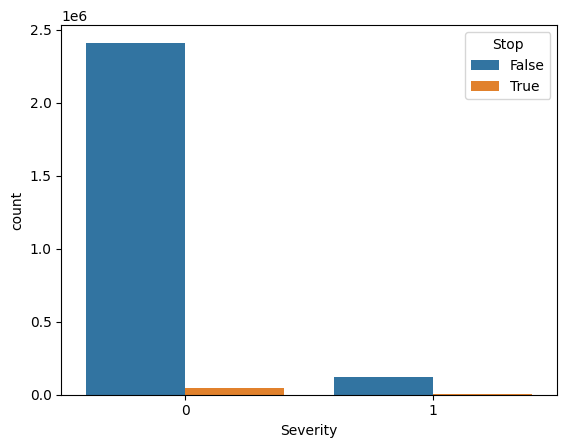

In [20]:
sns.countplot(x='Severity', data = df_numcp,  hue = 'Stop')

In [21]:
df_numcp.Stop.value_counts()

False    2534219
True       45429
Name: Stop, dtype: int64

### Variables con outliers:

En el caso de los árboles de decisión sabemos que son robustos ante outliers, pero como queremos a futuro aplicar más métodos haremos igual el análisis de valores extremos:

Severity Muestra la gravedad del accidente, un número entre 1 y 4, donde 1 indica el menor impacto en el tráfico (es decir, breve retraso como resultado del accidente) y 4 indica un impacto significativo en el tráfico (es decir, mucho retraso). 


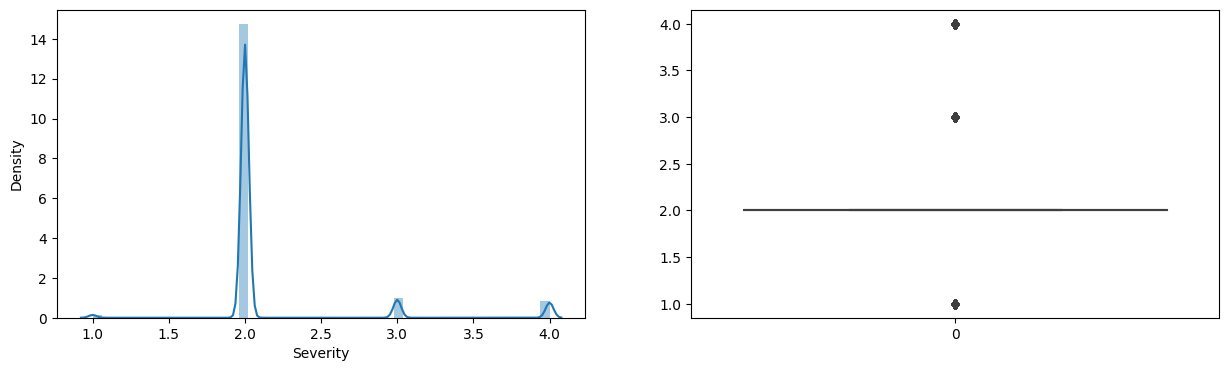

Temperature(F) Muestra la temperatura (en Fahrenheit). 


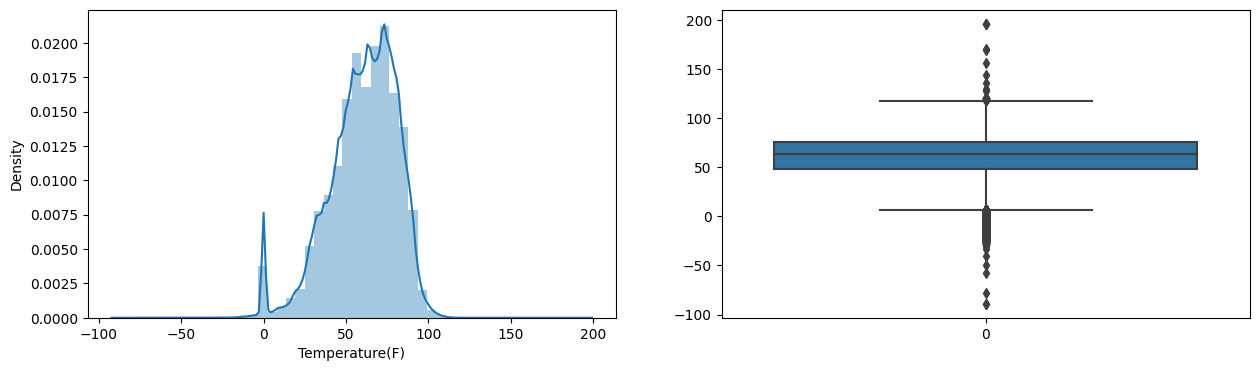

Precipitation(in) Muestra la cantidad de precipitación en pulgadas, si hay alguna. 


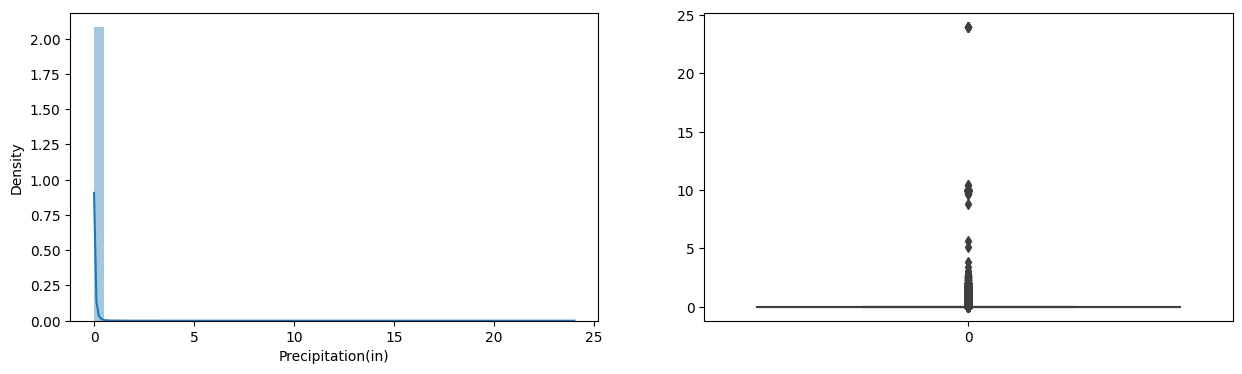

In [22]:
for col in ['Severity', 'Temperature(F)', 'Precipitation(in)']:
    print ( col, d_desc[col])
    fig, ax = plt.subplots(1,2, figsize=(15, 4))
    ax[0] = sns.distplot(df_num[col], ax=ax[0])
    ax[1] = sns.boxplot(df_num[col], ax=ax[1])
    plt.show()

Antes de elegir si hacemos algún tipo de transformación debemos analizar la relación de los valores outliers con el target. 

Severity Muestra la gravedad del accidente, un número entre 1 y 4, donde 1 indica el menor impacto en el tráfico (es decir, breve retraso como resultado del accidente) y 4 indica un impacto significativo en el tráfico (es decir, mucho retraso). 


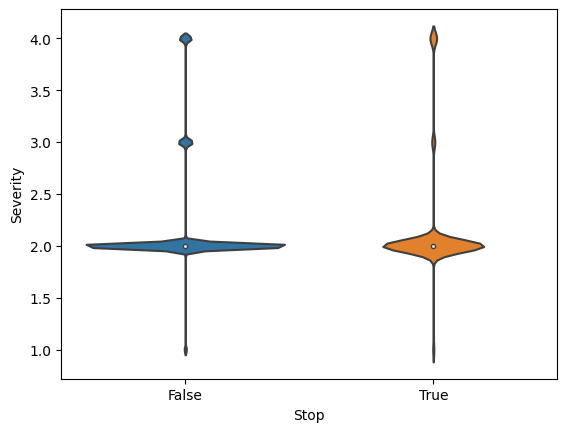

Temperature(F) Muestra la temperatura (en Fahrenheit). 


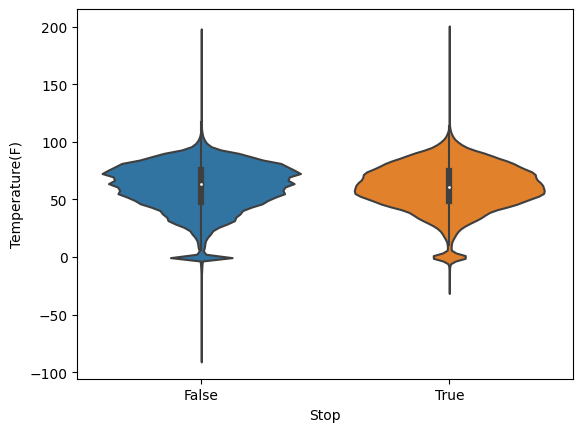

Precipitation(in) Muestra la cantidad de precipitación en pulgadas, si hay alguna. 


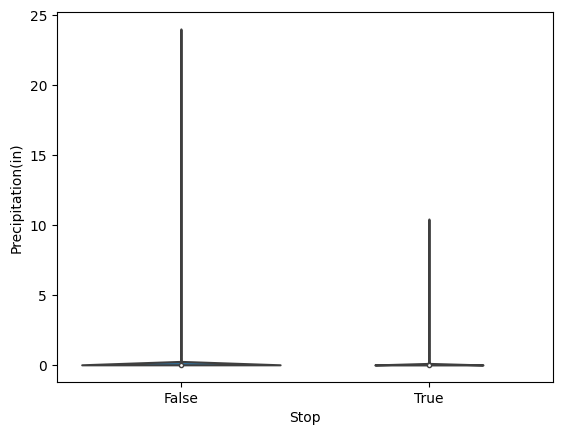

In [23]:
for col in ['Severity', 'Temperature(F)', 'Precipitation(in)']:
    print(col, d_desc[col])
    sns.violinplot(x='Stop', y=col, data=df_num)
    plt.show()

Tomamos la dicisión de procesar los valores outliers de "Precipitation(in)"  reemplazandolo por el valor tope del criterio intercuartil:

In [25]:
Q1 = full_df['Precipitation(in)'].quantile(0.25)
Q3 = full_df['Precipitation(in)'].quantile(0.75)

IQR = Q3-Q1

tope = Q3+1.5*IQR
tope


0.0

In [26]:
# creamos una nueva columas con valores reemplazados:
df_num['Precipitation(in)_proc'] = df_num['Precipitation(in)']
df_num.loc[df_num['Precipitation(in)_proc']>tope, 'Precipitation(in)_proc'] = tope

Tomamos la desición de procesar los valores de la variable "Temperature(F)" cambiando todo valor mayor o igual a 2 por 2:

In [27]:
# hacemos el reemplazo:
df_num['Temperature(F)_proc'] = df_num['Temperature(F)']
df_num.loc[df_num['Temperature(F)_proc']>=2, 'Temperature(F)_proc'] = 2

DESAFIO:realizar esto mismo con el comando apply

### Target numérico:

In [28]:
df_num.Stop.unique()

array([False,  True])

In [29]:
## Convertimos la variable Stop a valores enteros
#df_num['Stop'] = df_num.Stop.map({'False':0 , 'True':1})
df_num.Stop = df_num.Stop.replace({True: 1, False: 0})



In [30]:
df_num.Stop.unique()

array([0, 1])

## Inputs del modelo:

In [31]:
df_num.head()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Stop,Precipitation(in)_proc,Temperature(F)_proc
0,3,40.109,-83.093,40.112,-83.032,3.230,0.000,42.100,36.100,58.000,29.760,10.000,10.400,0.000,0,0.000,2.000
1,2,39.865,-84.063,39.865,-84.049,0.747,0.000,36.900,0.000,91.000,29.680,10.000,0.000,0.020,0,0.000,2.000
2,2,39.103,-84.525,39.102,-84.524,0.055,0.000,36.000,0.000,97.000,29.700,10.000,0.000,0.020,0,0.000,2.000
3,2,41.062,-81.538,41.062,-81.535,0.123,0.000,39.000,0.000,55.000,29.650,10.000,0.000,0.000,0,0.000,2.000
4,3,39.172,-84.493,39.170,-84.502,0.500,0.000,37.000,29.800,93.000,29.690,10.000,10.400,0.010,0,0.000,2.000


In [32]:
## nos quedamos con las columnas sin procesar outliers:
columnas1 = df_num.columns.tolist()[:-2]
columnas1

['Severity',
 'Start_Lat',
 'Start_Lng',
 'End_Lat',
 'End_Lng',
 'Distance(mi)',
 'Number',
 'Temperature(F)',
 'Wind_Chill(F)',
 'Humidity(%)',
 'Pressure(in)',
 'Visibility(mi)',
 'Wind_Speed(mph)',
 'Precipitation(in)',
 'Stop']

Pero también podríamos hacer pruebas con otras combinaciones de columnas:

In [33]:
# el target y todas las numericas procesando outliers
columnas2 = df_num.drop(['Precipitation(in)', 'Temperature(F)'], axis = 1).columns.tolist()

# el target y todas las numéricas salvo Severity sin procesar outliers
columnas3 = df_num.drop('Severity', axis = 1).columns.tolist()[:-2]

# el target y todas las numericas salvo Severity procesando outliers
columnas4 = df_num.drop(['Precipitation(in)', 'Temperature(F)', 'Severity'], axis = 1).columns.tolist()

## Modelo de Árbol 


### Train & Test Split (Se profundizara en la sig Clase)

In [34]:
# split del dataset
from sklearn.model_selection import train_test_split

In [35]:
# separamos las caracteristicas/features del target
X = df_num[columnas1]#.drop('y', axis=1)
y = df_num['Stop']

In [36]:
# train test split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=33,
                                                    stratify= y)


print('Tamaño del set de entrenamiento:', X_train.shape)
print('Tamaño del set de testeo:', X_test.shape)

Tamaño del set de entrenamiento: (2063718, 15)
Tamaño del set de testeo: (515930, 15)


In [37]:
# porcentaje de clase True en train
100*y_train.sum()/len(y_train)

1.7610448714407685

In [38]:
# porcentaje de clase True en test
100*y_test.sum()/len(y_test)

1.7610916209563312

### Árbol de Decisión:

Pros:
-------
* alta capacidad de explicar la decisión
* aceptan variables categóricas

Contras:
-----------
* necesitan data balanceada
* tienen a sobre ajuste (Se vera en la sig Clase)

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

Tener en cuenta que tanto los árboles como los ensambles de árboles, no necesitan escalado de valores.

In [39]:
# modelos
from sklearn.tree import DecisionTreeClassifier

In [40]:
# Paso 1: Instanciar el objeto/modelo
tree_model = DecisionTreeClassifier(random_state = 0, class_weight='balanced')

### Entrenamiento, predicción y evaluación:

In [41]:
# entrenamiento
#Paso 2: Ajustar el modelo con los datos
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=0)

### Predicciones:

In [42]:
# predicciones
# Paso 3: Predecir
y_pred = tree_model.predict(X_test)
y_pred_train = tree_model.predict(X_train)

In [43]:
X_test.shape, y_test.shape

((515930, 15), (515930,))

In [44]:
y_pred.shape

(515930,)

Miramos las 10 primeras predicciones:

In [45]:
X_test

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Stop
2109680,2,34.040,-117.154,34.040,-117.154,0.000,0.000,64.000,64.000,69.000,28.710,10.000,0.000,0.000,0
69555,3,39.714,-75.137,39.711,-75.128,0.552,570.000,82.000,0.000,51.000,29.920,10.000,9.200,0.000,0
2771813,4,40.812,-74.104,40.811,-74.103,0.099,0.000,65.000,65.000,20.000,29.930,10.000,25.000,0.000,0
2355059,2,43.688,-123.200,43.688,-123.200,0.000,0.000,39.000,39.000,89.000,29.880,10.000,0.000,0.000,0
1754450,2,42.165,-88.154,42.165,-88.155,0.037,630.000,45.000,43.000,49.000,29.290,10.000,5.000,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602603,2,46.399,-93.883,46.399,-93.880,0.162,16865.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0
458841,2,28.425,-81.474,28.420,-81.474,0.317,0.000,80.000,80.000,81.000,29.920,10.000,0.000,0.000,0
682666,2,39.020,-122.676,39.020,-122.676,0.046,12531.000,62.000,62.000,35.000,29.430,10.000,0.000,0.000,0
1324458,2,42.967,-85.702,42.973,-85.682,1.102,0.000,58.000,58.000,97.000,28.780,1.000,13.000,0.060,0


In [46]:
y_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Y lo comparamos con el valor real del target de las 10 primeras filas

In [47]:
y_test[:10].values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Evaluación (Se explicara en la sig Clase)

In [48]:
# evaluacion 
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Evaluamos el modelo en el conjunto de testeo:

In [49]:
recall = recall_score(y_train, y_pred_train)
precision = precision_score(y_train, y_pred_train)
acc = accuracy_score(y_train, y_pred_train)
f1 = f1_score(y_train, y_pred_train)

print('METRICAS TRAIN:')
print('Recall: {:.4f}'.format(recall))
print('Precision: {:.4f}'.format(precision))
print('F1: {:.4f}'.format(f1))
print('Accuracy: {:.4f}'.format(acc))

METRICAS TRAIN:
Recall: 1.0000
Precision: 1.0000
F1: 1.0000
Accuracy: 1.0000


Evaluamos el modelo ya entrenado en el conjunto de testeo:

In [50]:
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('METRICAS TEST:')
print('Recall: {:.4f}'.format(recall))
print('Precision: {:.4f}'.format(precision))
print('F1: {:.4f}'.format(f1))
print('Accuracy: {:.4f}'.format(acc))

METRICAS TEST:
Recall: 1.0000
Precision: 1.0000
F1: 1.0000
Accuracy: 1.0000


In [51]:
confusion_matrix(y_test, y_pred)

array([[506844,      0],
       [     0,   9086]])

In [52]:
y_test.value_counts()

0    506844
1      9086
Name: Stop, dtype: int64

In [53]:
type(y_pred)

numpy.ndarray

In [54]:
pd.Series(y_pred).value_counts()

0    506844
1      9086
dtype: int64

In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    506844
           1       1.00      1.00      1.00      9086

    accuracy                           1.00    515930
   macro avg       1.00      1.00      1.00    515930
weighted avg       1.00      1.00      1.00    515930



###  Probabilidades

In [56]:
proba = tree_model.predict_proba(X_test)

proba

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

### Feature importance

In [57]:
tree_model.feature_importances_

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       7.67697017e-12, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.00000000e+00])

In [58]:
df_importancia = pd.DataFrame({'Variable': X_train.columns.values.tolist(),
                               'Importancia': tree_model.feature_importances_}).sort_values(by='Importancia', ascending=False)

df_importancia

,Variable,Importancia
14,Stop,1.000
4,End_Lng,0.000
0,Severity,0.000
1,Start_Lat,0.000
2,Start_Lng,0.000
3,End_Lat,0.000
5,Distance(mi),0.000
6,Number,0.000
7,Temperature(F),0.000
8,Wind_Chill(F),0.000


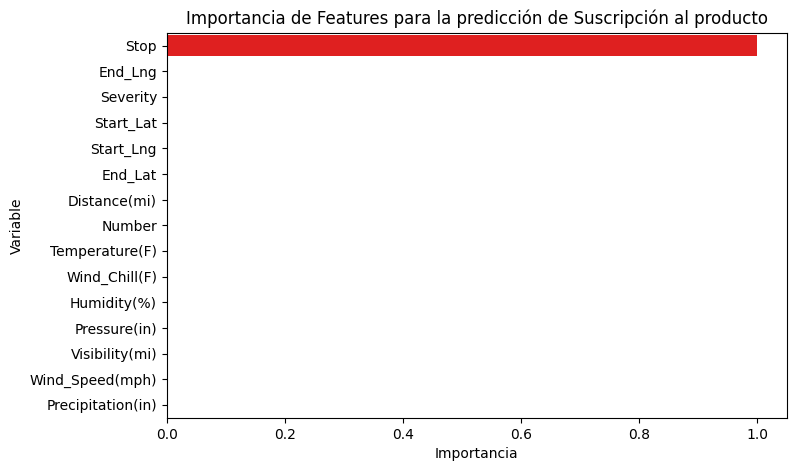

In [59]:
plt.figure(figsize=(8,5))

values = df_importancia.Importancia    

sns.barplot(y=df_importancia.Variable,
            x=values,
            palette = ['green' if (x < max(values)) else 'red' for x in values ]
           ).set(title='Importancia de Features para la predicción de Suscripción al producto')

plt.show()

## (EXTRA) Comparativas variando campos:

In [60]:
# inicializo los dataframes en donde voy a guardar la información de las métricas:
metricas_train = pd.DataFrame({'metricas':['recall', 'precision', 'accuracy', 'f1']})
metricas_test = pd.DataFrame({'metricas':['recall', 'precision', 'accuracy', 'f1']})

columnas5 = df_importancia.Variable.tolist()[:4]+['Stop']

for i, comb in enumerate([columnas1, columnas2, columnas3, columnas4, columnas5]):
    
    # separamos el target 
    X = df_num[comb].drop('Stop', axis=1)
    y = df_num['Stop']

    # dividimos en train y test 
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, # nos quedata dividido en 80% train y 20% test
                                                    random_state=33,# es la semilla para que cada vez que lo corramos de lo mismo
                                                    stratify = y)   # se separa "parejo" respecto a la variable y
                                                    
    # modelo
    tree_model = DecisionTreeClassifier(random_state = 42,
                                        class_weight='balanced') # para lidear con data desbalanceada
    # entrenamos y predecimos
    print('Entrenando modelo nro: ', i)
    tree_model.fit(X_train, y_train)
    
    y_pred = tree_model.predict(X_test)
    y_pred_train = tree_model.predict(X_train)
    
    # calculamos y guardamos los valores recall, precision, accuracy y f1
    metricas_train['mod'+str(i)] = [recall_score(y_train, y_pred_train), 
                                    precision_score(y_train, y_pred_train),
                                    accuracy_score(y_train, y_pred_train),
                                    f1_score(y_train, y_pred_train)]
    
    metricas_test['mod'+str(i)] = [recall_score(y_test, y_pred),
                                   precision_score(y_test, y_pred),
                                   accuracy_score(y_test, y_pred),
                                   f1_score(y_test, y_pred)]
    
    
    

Entrenando modelo nro:  0
Entrenando modelo nro:  1
Entrenando modelo nro:  2
Entrenando modelo nro:  3
Entrenando modelo nro:  4


In [61]:
metricas_train.set_index('metricas').T

metricas,recall,precision,accuracy,f1
mod0,1.000,1.000,1.000,1.000
mod1,1.000,1.000,1.000,1.000
mod2,1.000,1.000,1.000,1.000
mod3,1.000,1.000,1.000,1.000
mod4,1.000,0.996,1.000,0.998


In [62]:
metricas_test.set_index('metricas').T.sort_values(by='f1', ascending = False)

metricas,recall,precision,accuracy,f1
mod4,0.629,0.658,0.988,0.643
mod3,0.423,0.469,0.981,0.445
mod1,0.417,0.461,0.981,0.438
mod2,0.416,0.461,0.981,0.437
mod0,0.416,0.459,0.981,0.436


Como vemos el árbol generó un overfitting. Las técnicas para evitar el sobre entrenamiento las veremos en otra sección, pero para anticiparnos unas ideas pueden ser bajar la profundidad en el arbol, trabajar con menos variables, pre-pruning, post-pruning, o considerar otros modelos.

## Regresión Logistica

In [63]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X1 = scaler.transform(X)
X1 = pd.DataFrame(data = X1, columns= X.columns)

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X1, y,
                                                    test_size=0.2,
                                                    random_state=33,
                                                    stratify= y)



print('Tamaño del set de entrenamiento:', X_train.shape)
print('Tamaño del set de testeo:', X_test.shape)

Tamaño del set de entrenamiento: (2063718, 3)
Tamaño del set de testeo: (515930, 3)


In [65]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

In [66]:
y_pred = tree_model.predict(X_test)
y_pred_train = tree_model.predict(X_train)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    506844
           1       0.00      0.00      0.00      9086

    accuracy                           0.98    515930
   macro avg       0.49      0.50      0.50    515930
weighted avg       0.97      0.98      0.97    515930



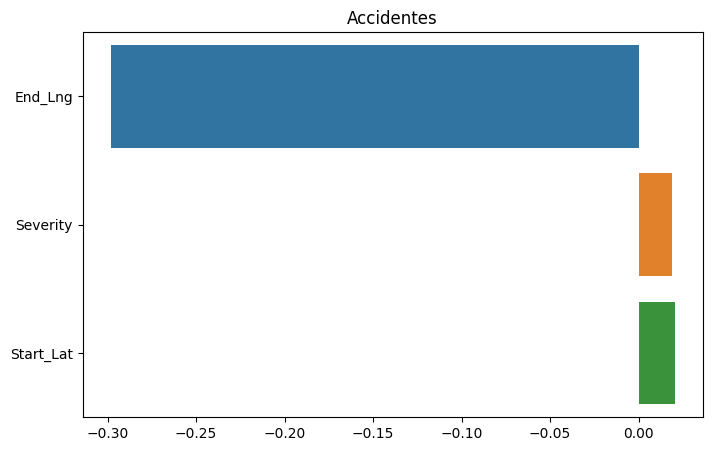

In [67]:
plt.figure(figsize=(8,5))

values = pd.Series(clf.coef_.flat)  

sns.barplot(y=X1.columns,
            x=values,
           ).set(title='Accidentes')

plt.show()

## Busqué bastante información de Internet para llegar hasta acá. Pero da para seguir investigando bastante.##